<a href="https://colab.research.google.com/github/vvrgit/NNDL-2020/blob/main/ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
data_norm = read_csv('/content/drive/MyDrive/NNDL-Data/Load Data in kW.csv')
data_norm

,Load (kW)
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980
...,...
2179,4626.51840
2180,4567.90752
2181,4723.63164
2182,5150.27520


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit_transform(data_norm)
data

array([[0.39787738],
       [0.29380046],
       [0.27645431],
       ...,
       [0.24629825],
       [0.32438447],
       [0.65165045]])

In [5]:
train_data=data[:2160]
train_data
test_data=data[2160:]
test_data
len(test_data)
train_data

array([[0.39787738],
       [0.29380046],
       [0.27645431],
       ...,
       [0.68414596],
       [0.51467861],
       [0.41730621]])

#Auto Regression

In [6]:
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(train_data, lags=[1,2,3,24,48,72,168,336,504])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             AutoReg Model Results                             
===============================================================================
Dep. Variable:                       y   No. Observations:                 2160
Model:             Restr. AutoReg(504)   Log Likelihood                1425.759
Method:                Conditional MLE   S.D. of innovations              0.102
Date:                 Wed, 01 Dec 2021   AIC                          -2829.518
Time:                         04:21:19   BIC                          -2769.984
Sample:                            504   HQIC                         -2807.449
                                  2160                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0550      0.010      5.620      0.000       0.036       0.074
y.L1           0.5659      0.025     22.644      0.000       0.517       0.615
y.L2          -0.0020      0.028     -0.073      0.942      -0.057       0.053
y.L3          -0.1103      0.022     -5.033      0.000      -0.153      -0.067
y.L24          0.2716      0.022     12.626      0.000       0.229       0.314
y.L48          0.0938      0.022      4.174      0.000       0.050       0.138
y.L72          0.0550      0.021      2.632      0.008       0.014       0.096
y.L168         0.0653      0.017      3.750      0.000       0.031       0.099
y.L336         0.0009      0.017      0.052      0.958      -0.032       0.034
y.L504        -0.0593      0.016     -3.660      0.000      -0.091      -0.028
                                     Roots                                     
===============================================================================
                    Real          Imaginary           Modulus         Frequency
-------------------------------------------------------------------------------
AR.1             -0.7750           -0.6428j            1.0069           -0.3898
AR.2             -0.7750           +0.6428j            1.0069            0.3898
AR.3             -0.7665           -0.6524j            1.0066           -0.3878
AR.4             -0.7665           +0.6524j            1.0066            0.3878
AR.5             -0.7585           -0.6616j            1.0065           -0.3858
AR.6             -0.7585           +0.6616j            1.0065            0.3858
AR.7             -0.7503           -0.6714j            1.0069           -0.3838
AR.8             -0.7503           +0.6714j            1.0069            0.3838
AR.9             -0.7413           -0.6808j            1.0065           -0.3818
AR.10            -0.7413           +0.6808j            1.0065            0.3818
AR.11            -0.7241           -0.6988j            1.0063           -0.3778
AR.12            -0.7241           +0.6988j            1.0063            0.3778
AR.13            -0.7147           -0.7075j            1.0057           -0.3758
AR.14            -0.7147           +0.7075j            1.0057            0.3758
AR.15            -0.7327           -0.6896j            1.0062           -0.3798
AR.16            -0.7327           +0.6896j            1.0062            0.3798
AR.17            -0.7064           -0.7155j            1.0054           -0.3740
AR.18            -0.7064           +0.7155j            1.0054            0.3740
AR.19            -0.6980           -0.7246j            1.0061           -0.3720
AR.20            -0.6980           +0.7246j            1.0061            0.3720
AR.21            -0.7829           -0.6327j            1.0066           -0.3918
AR.22            -0.7829           +0.6327j            1.0066            0.3918
AR.23            -0.6887           -0.7333j            1.0060           -0.3700
AR.24            -0.6887           +0.7333j  

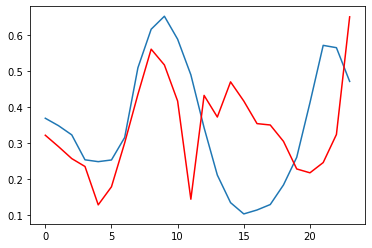

In [7]:
pred = model_fit.predict(start=len(train_data), end=2183, dynamic=False)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math as mt
mae=mean_absolute_error(test_data, pred)
rmse=mt.sqrt(mean_squared_error(test_data, pred))
print('MAE:',mae)
print('RMSE:',rmse)

MAE: 0.15169681241198626
RMSE: 0.18365560044175352


#Simple Exponential Smoothing

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# fit model
model = SimpleExpSmoothing(train_data)
model_fit = model.fit()
model_fit.summary()

Dep. Variable:,endog,No. Observations:,2160
Model:,SimpleExpSmoothing,SSE,35.818
Optimized:,True,AIC,-8850.738
Trend:,None,BIC,-8839.382
Seasonal:,None,AICC,-8850.720
Seasonal Periods:,None,Date:,"Wed, 01 Dec 2021"
Box-Cox:,False,Time:,04:21:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,0.3978774,l.0,True


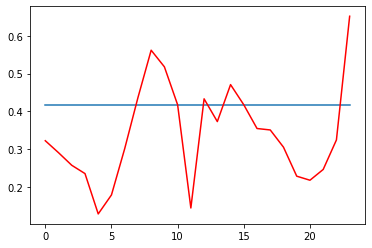

In [10]:
pred = model_fit.predict(start=len(train_data), end=2183)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math as mt
mae=mean_absolute_error(test_data, pred)
rmse=mt.sqrt(mean_squared_error(test_data, pred))
print('MAE:',mae)
print('RMSE:',rmse)

MAE: 0.12437947610489163
RMSE: 0.14964292590544157


#ARIMA Model

In [12]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.436241
p-value: 0.131768


In [13]:
# fit model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=([1,2,3,24,48,72],1,1))
ARIMA_fit = model.fit()
#[1,2,3,24,48,72,168,336,504]
ARIMA_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 2160
Model:             ARIMA([1, 2, 3, 24, 48, 72], 1, 1)   Log Likelihood                1916.215
Date:                                Wed, 01 Dec 2021   AIC                          -3816.429
Time:                                        04:22:09   BIC                          -3771.010
Sample:                                             0   HQIC                         -3799.817
                                               - 2160                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4766      0.018     26.084      0.000       0.441       0.512
ar.L2          0.0022      0.020      0.110      0.912      -0.036       0.040
ar.L3         -0.1626      0.017     -9.846      0.000      -0.195      -0.130
ar.L24         0.2410      0.015     15.643      0.000       0.211       0.271
ar.L48         0.1656      0.017      9.759      0.000       0.132       0.199
ar.L72         0.1159      0.015      7.570      0.000       0.086       0.146
ma.L1         -0.9181      0.009   -107.633      0.000      -0.935      -0.901
sigma2         0.0099      0.000     51.917      0.000       0.009       0.010
===================================================================================
Ljung-Box (L1) (Q):                   2.37   Jarque-Bera (JB):              1274.98
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.01
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

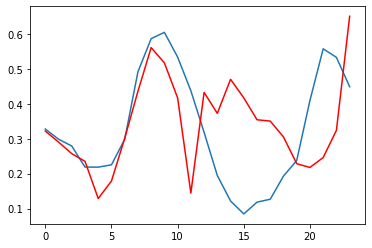

In [14]:
pred = ARIMA_fit.predict(start=len(train_data), end=2183)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math as mt
mae=mean_absolute_error(test_data, pred)
rmse=mt.sqrt(mean_squared_error(test_data, pred))
print('MAE:',mae)
print('RMSE:',rmse)

MAE: 0.1351863453692763
RMSE: 0.17534725055973582


#MA

In [16]:
# fit model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(0,0,1))
MA_fit = model.fit()
#[1,2,3,24,48,72,168,336,504]
MA_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2160
Model:                 ARIMA(0, 0, 1)   Log Likelihood                1117.190
Date:                Wed, 01 Dec 2021   AIC                          -2228.380
Time:                        04:22:10   BIC                          -2211.346
Sample:                             0   HQIC                         -2222.149
                               - 2160                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4866      0.005     93.401      0.000       0.476       0.497
ma.L1          0.6398      0.014     45.418      0.000       0.612       0.667
sigma2         0.0208      0.001     35.378      0.000       0.020       0.022
===================================================================================
Ljung-Box (L1) (Q):                 234.05   Jarque-Bera (JB):               103.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.36
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

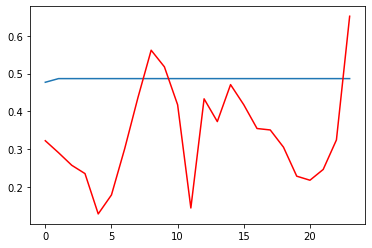

In [17]:
pred = MA_fit.predict(start=len(train_data), end=2183)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math as mt
mae=mean_absolute_error(test_data, pred)
rmse=mt.sqrt(mean_squared_error(test_data, pred))
print('MAE:',mae)
print('RMSE:',rmse)

MAE: 0.16861704796174815
RMSE: 0.19432112404086033


#ARMA

In [21]:
# fit model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=([1,2,3,24,48,72],0,1))
ARMA_fit = model.fit()
#[1,2,3,24,48,72,168,336,504]
ARMA_fit.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 2160
Model:             ARIMA([1, 2, 3, 24, 48, 72], 0, 1)   Log Likelihood                1887.218
Date:                                Wed, 01 Dec 2021   AIC                          -3756.436
Time:                                        04:28:58   BIC                          -3705.335
Sample:                                             0   HQIC                         -3737.746
                                               - 2160                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4747      0.026     18.211      0.000       0.424       0.526
ar.L1          0.3099      0.047      6.635      0.000       0.218       0.401
ar.L2          0.1547      0.033      4.650      0.000       0.089       0.220
ar.L3         -0.1282      0.017     -7.756      0.000      -0.161      -0.096
ar.L24         0.3011      0.016     18.297      0.000       0.269       0.333
ar.L48         0.1591      0.019      8.387      0.000       0.122       0.196
ar.L72         0.0974      0.017      5.600      0.000       0.063       0.131
ma.L1          0.2751      0.046      5.960      0.000       0.185       0.366
sigma2         0.0102      0.000     51.295      0.000       0.010       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):              1145.98
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.02
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

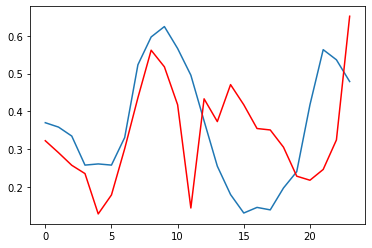

In [22]:
pred = ARMA_fit.predict(start=len(train_data), end=2183)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math as mt
mae=mean_absolute_error(test_data, pred)
rmse=mt.sqrt(mean_squared_error(test_data, pred))
print('MAE:',mae)
print('RMSE:',rmse)

MAE: 0.1408274698141395
RMSE: 0.1711254809566423


In [20]:
pip install --upgrade --no-deps statsmodels